# Yilun Wang(yilun830@bu.edu) - final project

# convert notebook to html then print as PDF

In [1]:
!jupyter nbconvert --to html /content/BA870_final_project_Yilun_Wang.ipynb


[NbConvertApp] WARNING | pattern '/content/BA870_final_project_Yilun_Wang.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.an

# main content

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# project tickers
pt = pd.read_csv('https://raw.githubusercontent.com/ChasteloveCNN/ba765-assignments/main/ProjectTickers.csv')

In [5]:
pt.head()

,Ticker,Name,RetYTD
0,A,Agilent Technologies,-0.2080
1,AA,Alcoa Corp,0.4731
2,AAL,American Airlines Gp,0.0579
3,AAN,Aarons Holdings Company,-0.1327
4,AAON,Aaon Inc,-0.3456


# (2) Determine Risk Exposures 


In [6]:
# upload stock return
data_return = pd.read_csv('https://raw.githubusercontent.com/ChasteloveCNN/ba765-assignments/main/efevj68i6ylkiw7c.csv')

In [7]:
# upload ff factors of year 2017-2021
ff_factors = pd.read_csv('https://raw.githubusercontent.com/ChasteloveCNN/ba765-assignments/main/FF-Factors-2017-2021.csv')

In [8]:
pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  1886 non-null   object 
 1   Name    1886 non-null   object 
 2   RetYTD  1886 non-null   float64
dtypes: float64(1), object(2)
memory usage: 44.3+ KB


In [9]:
data_return.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114715 entries, 0 to 114714
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   PERMNO  114715 non-null  int64 
 1   date    114715 non-null  int64 
 2   TICKER  114653 non-null  object
 3   RET     114700 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.5+ MB


In [10]:
# change RET type to float, outliers would be transfer to "NaN"
data_return['RET'] = pd.to_numeric(data_return['RET'],errors='coerce')

In [11]:
# check again type
data_return.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114715 entries, 0 to 114714
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PERMNO  114715 non-null  int64  
 1   date    114715 non-null  int64  
 2   TICKER  114653 non-null  object 
 3   RET     114629 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.5+ MB


In [12]:
# check null values
data_return.isna().sum()

PERMNO     0
date       0
TICKER    62
RET       86
dtype: int64

In [20]:
data_return.describe()

,PERMNO,date,RET
count,114715.000000,1.147150e+05,114715.000000
mean,55674.219867,2.019067e+07,0.017785
std,32590.698617,1.414730e+04,0.155750
min,10026.000000,2.017013e+07,-0.889030
25%,15775.000000,2.018033e+07,-0.045573
50%,72864.000000,2.019063e+07,0.012819
75%,86174.500000,2.020093e+07,0.070031
max,93436.000000,2.021123e+07,16.250530


In [13]:
# fill NA with 0
data_return['RET'].fillna(0, inplace=True)

In [15]:
# check NA again
data_return.isna().sum()

PERMNO     0
date       0
TICKER    62
RET        0
dtype: int64

In [14]:
data_return.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114715 entries, 0 to 114714
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PERMNO  114715 non-null  int64  
 1   date    114715 non-null  int64  
 2   TICKER  114653 non-null  object 
 3   RET     114715 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.5+ MB


In [ ]:
data_return.head()

,PERMNO,date,TICKER,RET
0,10026,20170131,JJSF,-0.043918
1,10026,20170228,JJSF,0.048836
2,10026,20170331,JJSF,0.016293
3,10026,20170428,JJSF,-0.007229
4,10026,20170531,JJSF,-0.033289


In [ ]:
ff_factors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dateff  60 non-null     int64  
 1   mktrf   60 non-null     float64
 2   smb     60 non-null     float64
 3   hml     60 non-null     float64
 4   rf      60 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.5 KB


In [ ]:
ff_factors.head()

,dateff,mktrf,smb,hml,rf
0,20170131,0.0194,-0.0113,-0.0274,0.0004
1,20170228,0.0357,-0.0204,-0.0167,0.0004
2,20170331,0.0017,0.0113,-0.0333,0.0003
3,20170428,0.0109,0.0072,-0.0213,0.0005
4,20170531,0.0106,-0.0252,-0.0375,0.0006


### Rename date column to "date" to match WRDS data "date" column for each stock


In [ ]:
# Rename date column to "date" to match WRDS data "date" column for each stock
ff_factors.rename(columns={'dateff':'date'}, inplace=True)
ff_factors.head()

,date,mktrf,smb,hml,rf
0,20170131,0.0194,-0.0113,-0.0274,0.0004
1,20170228,0.0357,-0.0204,-0.0167,0.0004
2,20170331,0.0017,0.0113,-0.0333,0.0003
3,20170428,0.0109,0.0072,-0.0213,0.0005
4,20170531,0.0106,-0.0252,-0.0375,0.0006


## Create loops for each stock to get new dataframe for each stock's monthly data

### create a vacant dataframe for final outputs

In [ ]:
# create a vacant dataframe for final outputs
final_outputs = pd.DataFrame(columns=['TICKER', 'mktrf','smb','hml'])
final_outputs.head()

,TICKER,mktrf,smb,hml


### create loop

In [ ]:
for x in pt['Ticker']:
  # create new df for x stock
  x_data = data_return[data_return["TICKER"] == x]

  # merge x_data & ff_factors for each x
  x_ff = pd.merge(x_data, ff_factors, on='date', how='outer')

  # Run OLS regression for each x (60 months) using FF 3-factor model
  y = x_ff["RET"] - x_ff["rf"]
  X = x_ff[['mktrf' , 'smb' , 'hml']] 

  # Use statsmodels 
  X = sm.add_constant(X) # adding a constant
  model = sm.OLS(y, X).fit()

  # create a new df for our necessary parameters
  # model.params has 4 numbers: alpha/mktrf/smb/hml
  # tickers = X'name, and we also have other two r-squareds.
  # As a result, we get a new df with 7 parameters as following:
  new=pd.DataFrame({'mktrf': [model.params[1]],
                    'smb': [model.params[2]],
                    'hml': [model.params[3]],
                    'TICKER': [x]
                    })

  # Store the above items (TICKER, R-squared, Adj. R-squared, const, mktrf, smb, hml) to a row in the final_outputs dataframe. 
  final_outputs=final_outputs.append(new,ignore_index=True)
  # finish!


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# check our final results
final_outputs.head(20)

,TICKER,mktrf,smb,hml
0,A,1.014152,-0.253674,-0.143608
1,AA,1.984149,0.527862,1.924844
2,AAL,1.315550,0.612825,1.248123
3,AAN,1.640807,0.141355,0.841349
4,AAON,0.516779,0.422130,-0.117068
5,AAP,1.112646,0.123161,0.469651
6,AAPL,1.314647,-0.344850,-0.714986
7,AAT,1.007945,0.384752,0.685424
8,AAWW,0.971779,0.591275,0.283819
9,ABBV,0.774071,0.083434,0.204134


In [ ]:
final_outputs.isna().sum()

TICKER    0
mktrf     0
smb       0
hml       0
dtype: int64

### Write the contents of the dataframe to a CSV file with the name "FF-Exposures.csv"

In [ ]:
final_outputs.to_csv("FF-Exposures.csv")

# (3) Calculate Financial Ratios 

In [ ]:
# import financials
fin = pd.read_csv('https://raw.githubusercontent.com/ChasteloveCNN/ba765-assignments/main/Project-2021-Financials.csv')

In [ ]:
fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gvkey     1886 non-null   int64  
 1   datadate  1886 non-null   int64  
 2   fyear     1886 non-null   int64  
 3   indfmt    1886 non-null   object 
 4   consol    1886 non-null   object 
 5   popsrc    1886 non-null   object 
 6   datafmt   1886 non-null   object 
 7   tic       1886 non-null   object 
 8   curcd     1886 non-null   object 
 9   at        1886 non-null   float64
 10  ceq       1886 non-null   float64
 11  csho      1886 non-null   float64
 12  dt        1649 non-null   float64
 13  ebit      1886 non-null   float64
 14  lt        1881 non-null   float64
 15  ni        1886 non-null   float64
 16  oancf     1885 non-null   float64
 17  sale      1886 non-null   float64
 18  seq       1886 non-null   float64
 19  costat    1886 non-null   object 
 20  prcc_c    1886 non-null   floa

In [ ]:
# rename column
fin.rename(columns={'tic':'Ticker'}, inplace=True)
fin.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,Ticker,curcd,at,...,csho,dt,ebit,lt,ni,oancf,sale,seq,costat,prcc_c
0,1004,20210531,2020,INDL,C,D,STD,AIR,USD,1539.700,...,35.375,205.1,65.50,565.300,35.80,105.200,1651.400,974.4,A,36.22
1,1045,20211231,2021,INDL,C,D,STD,AAL,USD,66467.000,...,647.728,46177.0,-5514.00,73807.000,-1993.00,704.000,29882.000,-7340.0,A,17.96
2,1075,20211231,2021,INDL,C,D,STD,PNW,USD,22003.222,...,112.927,NaN,805.31,15981.762,618.72,860.014,3803.835,5906.2,A,70.59
3,1078,20211231,2021,INDL,C,D,STD,ABT,USD,75196.000,...,1764.082,19251.0,8966.00,39172.000,7071.00,10533.000,43075.000,35802.0,A,140.74
4,1161,20211231,2021,INDL,C,D,STD,AMD,USD,12419.000,...,1207.000,732.0,3678.00,4922.000,3162.00,3521.000,16434.000,7497.0,A,143.90


In [ ]:
# merge two datasets
df = pd.merge(fin, pt, how='outer', on='Ticker')

In [ ]:
df.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,Ticker,curcd,at,...,ebit,lt,ni,oancf,sale,seq,costat,prcc_c,Name,RetYTD
0,1004,20210531,2020,INDL,C,D,STD,AIR,USD,1539.700,...,65.50,565.300,35.80,105.200,1651.400,974.4,A,36.22,AAR Corp,0.2944
1,1045,20211231,2021,INDL,C,D,STD,AAL,USD,66467.000,...,-5514.00,73807.000,-1993.00,704.000,29882.000,-7340.0,A,17.96,American Airlines Gp,0.0579
2,1075,20211231,2021,INDL,C,D,STD,PNW,USD,22003.222,...,805.31,15981.762,618.72,860.014,3803.835,5906.2,A,70.59,Pinnacle West Capital Corp,0.0985
3,1078,20211231,2021,INDL,C,D,STD,ABT,USD,75196.000,...,8966.00,39172.000,7071.00,10533.000,43075.000,35802.0,A,140.74,Abbott Laboratories,-0.1638
4,1161,20211231,2021,INDL,C,D,STD,AMD,USD,12419.000,...,3678.00,4922.000,3162.00,3521.000,16434.000,7497.0,A,143.90,Adv Micro Devices,-0.3533


## Create ratios

In [ ]:
# create 4 market ratios and take the inverse
df['book/price'] = df['ceq'] / (df['prcc_c'] * df['csho'])
df['e/price'] = df['ni'] / (df['prcc_c'] * df['csho'])
df['sale/price'] = df['sale'] / (df['prcc_c'] * df['csho'])
df['ebit/price'] = df['ebit'] / (df['prcc_c'] * df['csho'])

# create 6 other ratios
df['price/cashflow'] = (df['prcc_c'] * df['csho']) / df['oancf']
df['totaldebt/totalassets'] = df['dt'] / df['at']
df['totaldebt/equity'] = df['lt'] / df['seq']
df['roa'] = df['ebit'] / df['at']
df['totaldebt/totalliabilies'] = df['lt'] / df['at']
df['totaldebt/capital'] = df['dt'] / (df['dt'] + df['ceq'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 0 to 1885
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gvkey                     1886 non-null   int64  
 1   datadate                  1886 non-null   int64  
 2   fyear                     1886 non-null   int64  
 3   indfmt                    1886 non-null   object 
 4   consol                    1886 non-null   object 
 5   popsrc                    1886 non-null   object 
 6   datafmt                   1886 non-null   object 
 7   Ticker                    1886 non-null   object 
 8   curcd                     1886 non-null   object 
 9   at                        1886 non-null   float64
 10  ceq                       1886 non-null   float64
 11  csho                      1886 non-null   float64
 12  dt                        1649 non-null   float64
 13  ebit                      1886 non-null   float64
 14  lt      

In [ ]:
# check null value
df.isna().sum()

gvkey                         0
datadate                      0
fyear                         0
indfmt                        0
consol                        0
popsrc                        0
datafmt                       0
Ticker                        0
curcd                         0
at                            0
ceq                           0
csho                          0
dt                          237
ebit                          0
lt                            5
ni                            0
oancf                         1
sale                          0
seq                           0
costat                        0
prcc_c                        0
Name                          0
RetYTD                        0
book/price                    0
e/price                       0
sale/price                    0
ebit/price                    0
price/cashflow                1
totaldebt/totalassets       237
totaldebt/equity              5
roa                           0
totaldeb

## Winsorize

In [ ]:
#import winsorize
from scipy.stats.mstats import winsorize

### winsorize for price/cashflow:

In [ ]:
# winsorize
df['price/cashflow'] = winsorize(df['price/cashflow'], (0.01,0.01))
df['price/cashflow'].describe()

count    1886.000000
mean       18.696278
std        49.327257
min      -142.704032
25%         5.901279
50%        12.229813
75%        23.454398
max       340.564298
Name: price/cashflow, dtype: float64

### winsorize for totaldebt/totalassets:

In [ ]:
# because we lose 237 values, which is a lot. So we fill the NA with average value
df['totaldebt/totalassets'].fillna(df['totaldebt/totalassets'].mean(), inplace=True)
df['totaldebt/totalassets'].describe()

count    1886.000000
mean        0.330024
std         0.237333
min         0.000000
25%         0.176501
50%         0.330024
75%         0.430186
max         3.165332
Name: totaldebt/totalassets, dtype: float64

### winsorize for totaldebt/equity:

In [ ]:
# winsorize
df['totaldebt/equity'] = winsorize(df['totaldebt/equity'], (0.01,0.01))
df['totaldebt/equity'].describe()

count    1886.000000
mean        2.755861
std         5.741946
min       -24.094786
25%         0.759778
50%         1.538695
75%         3.468388
max        31.522617
Name: totaldebt/equity, dtype: float64

### winsorize for totaldebt/totalliabilies:

In [ ]:
# winsorize
df['totaldebt/totalliabilies'] = winsorize(df['totaldebt/totalliabilies'], (0.01,0.01))
df['totaldebt/totalliabilies'].describe()

count    1886.000000
mean        0.631315
std         0.256761
min         0.086737
25%         0.460233
50%         0.633081
75%         0.802777
max         1.552428
Name: totaldebt/totalliabilies, dtype: float64

### winsorize for totaldebt/capital:

In [ ]:
# winsorize
df['totaldebt/capital'].fillna(df['totaldebt/capital'].mean(), inplace=True)
df['totaldebt/capital'].describe()

count    1886.000000
mean        0.470835
std         0.392527
min        -3.714286
25%         0.276201
50%         0.470835
75%         0.588980
max         6.584568
Name: totaldebt/capital, dtype: float64

## double check:

In [ ]:
df.isna().sum()

gvkey                         0
datadate                      0
fyear                         0
indfmt                        0
consol                        0
popsrc                        0
datafmt                       0
Ticker                        0
curcd                         0
at                            0
ceq                           0
csho                          0
dt                          237
ebit                          0
lt                            5
ni                            0
oancf                         1
sale                          0
seq                           0
costat                        0
prcc_c                        0
Name                          0
RetYTD                        0
book/price                    0
e/price                       0
sale/price                    0
ebit/price                    0
price/cashflow                0
totaldebt/totalassets         0
totaldebt/equity              0
roa                           0
totaldeb

In [ ]:
df.columns[-10:]

Index(['book/price', 'e/price', 'sale/price', 'ebit/price', 'price/cashflow',
       'totaldebt/totalassets', 'totaldebt/equity', 'roa',
       'totaldebt/totalliabilies', 'totaldebt/capital'],
      dtype='object')

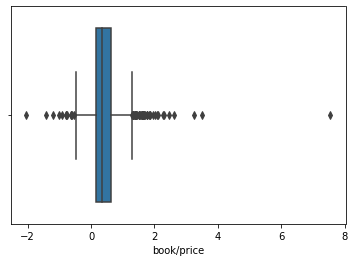

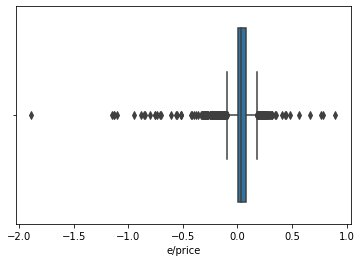

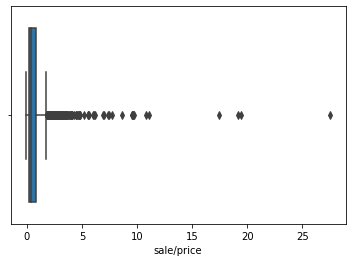

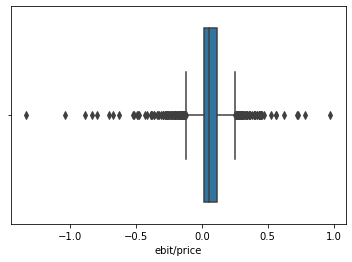

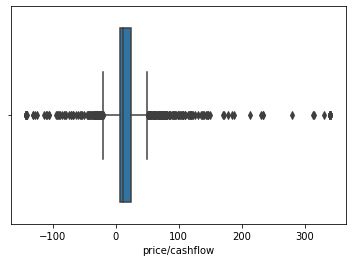

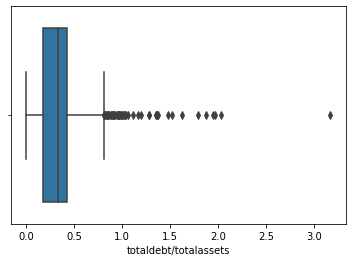

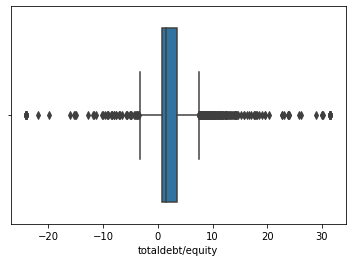

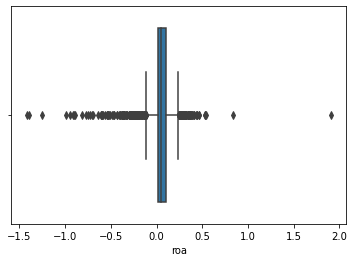

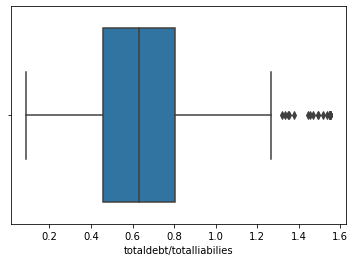

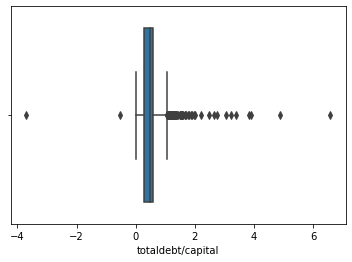

In [ ]:
for i in df.columns[-10:]: 
 sns.boxplot(x = df[i])
 plt.show()

## Save variables to new csv

In [ ]:
  # save 10 ratios and ticker symbol to new dataframe
  new=pd.DataFrame({'Ticker': df['Ticker'],
                    'book/price': df['book/price'],
                    'e/price': df['e/price'],
                    'sale/price': df['sale/price'],
                    'ebit/price': df['ebit/price'],
                    'price/cashflow': df['price/cashflow'],
                    'totaldebt/totalassets': df['totaldebt/totalassets'],
                    'totaldebt/equity': df['totaldebt/equity'],
                    'roa': df['roa'],
                    'totaldebt/totalliabilies': df['totaldebt/totalliabilies'],
                    'totaldebt/capital': df['totaldebt/capital'],
                    })
  new.head(5)

,Ticker,book/price,e/price,sale/price,ebit/price,price/cashflow,totaldebt/totalassets,totaldebt/equity,roa,totaldebt/totalliabilies,totaldebt/capital
0,AIR,0.760488,0.027941,1.288865,0.051121,12.179491,0.133208,0.580152,0.042541,0.367149,0.173887
1,AAL,-0.630953,-0.171320,2.568684,-0.473988,16.524425,0.694736,-10.055450,-0.082958,1.110431,1.188995
2,PNW,0.740913,0.077616,0.477178,0.101023,9.269055,0.330024,2.705930,0.036600,0.726337,0.470835
3,ABT,0.144202,0.028480,0.173496,0.036113,23.571338,0.256011,1.094129,0.119235,0.520932,0.349681
4,AMD,0.043164,0.018205,0.094618,0.021176,49.328969,0.058942,0.656529,0.296159,0.396328,0.088954


In [ ]:
new.describe()

,book/price,e/price,sale/price,ebit/price,price/cashflow,totaldebt/totalassets,totaldebt/equity,roa,totaldebt/totalliabilies,totaldebt/capital
count,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000
mean,0.422120,0.027009,0.765997,0.060538,18.696278,0.330024,2.755861,0.047180,0.631315,0.470835
std,0.424100,0.136353,1.439881,0.130324,49.327257,0.237333,5.741946,0.157399,0.256761,0.392527
min,-2.056645,-1.891725,-0.087004,-1.334204,-142.704032,0.000000,-24.094786,-1.420596,0.086737,-3.714286
25%,0.161112,0.008113,0.176223,0.019641,5.901279,0.176501,0.759778,0.018602,0.460233,0.276201
50%,0.337004,0.036704,0.350729,0.056821,12.229813,0.330024,1.538695,0.053231,0.633081,0.470835
75%,0.613868,0.076322,0.814565,0.113822,23.454398,0.430186,3.468388,0.106175,0.802777,0.588980
max,7.547555,0.898517,27.543662,0.974888,340.564298,3.165332,31.522617,1.908472,1.552428,6.584568


plot the heatmap

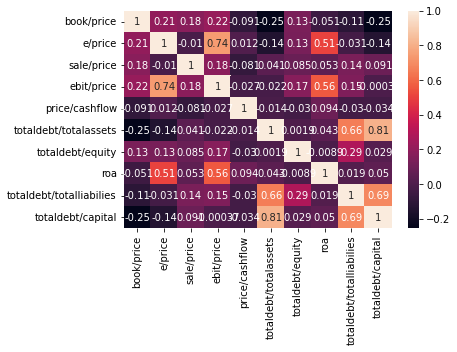

In [ ]:
sns.heatmap(new.corr(), annot=True)
plt.show()

In [ ]:
# dataframe to csv
new.to_csv("Fin-Ratios.csv")

# (4) Industry Indicators

In [ ]:
# import temGICS.csv
temp = pd.read_csv('https://raw.githubusercontent.com/ChasteloveCNN/ba765-session02/main/tempGICSS.csv')

In [ ]:
# import project tickers.csv
data1 = pd.read_csv('https://raw.githubusercontent.com/ChasteloveCNN/ba765-session02/main/ProjectTickers.csv')

In [ ]:
temp.isna().sum()

gvkey       0
datadate    0
fyear       0
indfmt      0
consol      0
popsrc      0
datafmt     0
tic         0
curcd       0
costat      0
ggroup      0
dtype: int64

In [ ]:
data1.isna().sum()

Ticker    0
Name      0
RetYTD    0
dtype: int64

In [ ]:
# rename column
temp.rename(columns={'tic':'Ticker'}, inplace=True)
temp.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,Ticker,curcd,costat,ggroup
0,1004,20210531,2020,INDL,C,D,STD,AIR,USD,A,2010
1,1045,20211231,2021,INDL,C,D,STD,AAL,USD,A,2030
2,1075,20211231,2021,INDL,C,D,STD,PNW,USD,A,5510
3,1078,20211231,2021,INDL,C,D,STD,ABT,USD,A,3510
4,1161,20211231,2021,INDL,C,D,STD,AMD,USD,A,4530


In [ ]:
# merge two datasets
df2 = pd.merge(temp, data1, how='outer', on='Ticker')

In [ ]:
df2.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,Ticker,curcd,costat,ggroup,Name,RetYTD
0,1004,20210531,2020,INDL,C,D,STD,AIR,USD,A,2010,AAR Corp,0.2944
1,1045,20211231,2021,INDL,C,D,STD,AAL,USD,A,2030,American Airlines Gp,0.0579
2,1075,20211231,2021,INDL,C,D,STD,PNW,USD,A,5510,Pinnacle West Capital Corp,0.0985
3,1078,20211231,2021,INDL,C,D,STD,ABT,USD,A,3510,Abbott Laboratories,-0.1638
4,1161,20211231,2021,INDL,C,D,STD,AMD,USD,A,4530,Adv Micro Devices,-0.3533


In [ ]:
# get dummy
df2 = pd.get_dummies(df2, columns=['ggroup'])
df2.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,Ticker,curcd,costat,...,ggroup_4010,ggroup_4020,ggroup_4030,ggroup_4510,ggroup_4520,ggroup_4530,ggroup_5010,ggroup_5020,ggroup_5510,ggroup_6010
0,1004,20210531,2020,INDL,C,D,STD,AIR,USD,A,...,0,0,0,0,0,0,0,0,0,0
1,1045,20211231,2021,INDL,C,D,STD,AAL,USD,A,...,0,0,0,0,0,0,0,0,0,0
2,1075,20211231,2021,INDL,C,D,STD,PNW,USD,A,...,0,0,0,0,0,0,0,0,1,0
3,1078,20211231,2021,INDL,C,D,STD,ABT,USD,A,...,0,0,0,0,0,0,0,0,0,0
4,1161,20211231,2021,INDL,C,D,STD,AMD,USD,A,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 0 to 1885
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gvkey        1886 non-null   int64  
 1   datadate     1886 non-null   int64  
 2   fyear        1886 non-null   int64  
 3   indfmt       1886 non-null   object 
 4   consol       1886 non-null   object 
 5   popsrc       1886 non-null   object 
 6   datafmt      1886 non-null   object 
 7   Ticker       1886 non-null   object 
 8   curcd        1886 non-null   object 
 9   costat       1886 non-null   object 
 10  Name         1886 non-null   object 
 11  RetYTD       1886 non-null   float64
 12  ggroup_1010  1886 non-null   uint8  
 13  ggroup_1510  1886 non-null   uint8  
 14  ggroup_2010  1886 non-null   uint8  
 15  ggroup_2020  1886 non-null   uint8  
 16  ggroup_2030  1886 non-null   uint8  
 17  ggroup_2510  1886 non-null   uint8  
 18  ggroup_2520  1886 non-null   uint8  
 19  ggroup

In [ ]:
# delete useless columns 
del df2['gvkey']
del df2['datadate']
del df2['fyear']
del df2['indfmt']
del df2['consol']
del df2['popsrc']
del df2['datafmt']
del df2['curcd']
del df2['costat']
del df2['Name ']
del df2['RetYTD']


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 0 to 1885
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ticker       1886 non-null   object
 1   ggroup_1010  1886 non-null   uint8 
 2   ggroup_1510  1886 non-null   uint8 
 3   ggroup_2010  1886 non-null   uint8 
 4   ggroup_2020  1886 non-null   uint8 
 5   ggroup_2030  1886 non-null   uint8 
 6   ggroup_2510  1886 non-null   uint8 
 7   ggroup_2520  1886 non-null   uint8 
 8   ggroup_2530  1886 non-null   uint8 
 9   ggroup_2550  1886 non-null   uint8 
 10  ggroup_3010  1886 non-null   uint8 
 11  ggroup_3020  1886 non-null   uint8 
 12  ggroup_3030  1886 non-null   uint8 
 13  ggroup_3510  1886 non-null   uint8 
 14  ggroup_3520  1886 non-null   uint8 
 15  ggroup_4010  1886 non-null   uint8 
 16  ggroup_4020  1886 non-null   uint8 
 17  ggroup_4030  1886 non-null   uint8 
 18  ggroup_4510  1886 non-null   uint8 
 19  ggroup_4520  1886 non-null 

## Save variables to new csv

In [ ]:
# dataframe to csv
df2.to_csv("Industry.csv")

# (5) Run OLS explanatory for 4 categories

## a. Risk Regressions:

In [ ]:
# import FF exposures csv
ff1=pd.read_csv('https://raw.githubusercontent.com/ChasteloveCNN/ba765-assignments/main/FF-Exposures.csv')

In [ ]:
# rename column
ff1.rename(columns={'TICKER':'Ticker'}, inplace=True)

In [ ]:
# merge FF exposures and tickers retYTD 
dfa = pd.merge(ff1, pt, how='outer', on='Ticker')

In [ ]:
dfa.head()

,Unnamed: 0,Ticker,mktrf,smb,hml,Name,RetYTD
0,0,A,1.014152,-0.253674,-0.143608,Agilent Technologies,-0.2080
1,1,AA,1.984149,0.527862,1.924844,Alcoa Corp,0.4731
2,2,AAL,1.315550,0.612825,1.248123,American Airlines Gp,0.0579
3,3,AAN,1.640807,0.141355,0.841349,Aarons Holdings Company,-0.1327
4,4,AAON,0.516779,0.422130,-0.117068,Aaon Inc,-0.3456


In [ ]:
# Run OLS regression
y = dfa["RetYTD"]
X = dfa[['mktrf' , 'smb' , 'hml']]
# Use statsmodels 
X = sm.add_constant(X) # adding a constant
model = sm.OLS(y, X).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RetYTD   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     65.51
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           2.76e-40
Time:                        18:36:52   Log-Likelihood:                 79.945
No. Observations:                1886   AIC:                            -151.9
Df Residuals:                    1882   BIC:                            -129.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0981      0.011     -8.783      0.000      -0.120      -0.076
mktrf          0.0082      0.009      0.957      0.339      -0.009       0.025
smb           -0.0120      0.004     -2.736      0.006      -0.021      -0.003
hml            0.1068      0.008     13.814      0.000       0.092       0.122
==============================================================================
Omnibus:                      642.171   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3599.566
Skew:                           1.492   Prob(JB):                         0.00
Kurtosis:                       9.074   Cond. No.                         4.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Through the regression, we can find the R-squared is 0.095 and Adj.R-squared is 0.093, which is not good. The explanatory level is low.
Also, mktrf and hml's coefficient are positive(0.0082 and 0.1068), which means the size and market exposure have posive effect on stock return. Finally, the negative coefficient(-0.0120) of smb means that size exposure has negative effect on stock return.

## b. Financial Characteristics: 

In [ ]:
# import fin ratios csv
ff2=pd.read_csv('https://raw.githubusercontent.com/ChasteloveCNN/ba765-assignments/main/Fin-Ratios.csv')

# merge FF exposures and tickers retYTD 
dfb = pd.merge(ff2, pt, how='outer', on='Ticker')

# Run OLS regression
y = dfb["RetYTD"]
X = dfb[['book/price' , 'e/price' , 'sale/price','ebit/price','price/cashflow',
         'totaldebt/totalassets','totaldebt/equity','roa','totaldebt/totalliabilies','totaldebt/capital']]

# Use statsmodels 
X = sm.add_constant(X) # adding a constant
model = sm.OLS(y, X).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RetYTD   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     17.46
Date:                Thu, 28 Apr 2022   Prob (F-statistic):           9.87e-31
Time:                        18:36:52   Log-Likelihood:                 70.268
No. Observations:                1886   AIC:                            -118.5
Df Residuals:                    1875   BIC:                            -57.57
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.1639      0.017     -9.731      0.000      -0.197      -0.131
book/price                   0.1370      0.014      9.704      0.000       0.109       0.165
e/price                     -0.1240      0.063     -1.965      0.050      -0.248      -0.000
sale/price                   0.0130      0.004      3.251      0.001       0.005       0.021
ebit/price                   0.1436      0.071      2.020      0.043       0.004       0.283
price/cashflow              -0.0001      0.000     -1.105      0.269      -0.000    9.49e-05
totaldebt/totalassets        0.0759      0.041      1.855      0.064      -0.004       0.156
totaldebt/equity            -0.0020      0.001     -1.976      0.048      -0.004   -1.49e-05
roa                          0.1464      0.044      3.322      0.001       0.060       0.233
totaldebt/totalliabilies    -0.0155      0.033     -0.463      0.644      -0.081       0.050
totaldebt/capital            0.0277      0.026      1.078      0.281      -0.023       0.078
==============================================================================
Omnibus:                      649.740   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4325.518
Skew:                           1.454   Prob(JB):                         0.00
Kurtosis:                       9.826   Cond. No.                         849.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Through the regression, we can find the R-squared is 0.085 and Adj.R-squared is 0.080, which is not good. The explanatory level is low.
Also, (book/price, sale/price, ebit/price, totaldebt/
totalassets, roa, totaldebt/capital)'s coefficient are positive, which means they have posive effect on stock return. 
Finally, the negative coefficient of (e/price, price/cashflow, totaldebt/equity, totaldebt/totalliabilities) means that they have negative effect on stock return.

## c. Industry Dummies:

In [ ]:
# import fin ratios csv
ff3=pd.read_csv('https://raw.githubusercontent.com/ChasteloveCNN/ba765-assignments/main/Industry.csv')

# merge FF exposures and tickers retYTD 
dfc = pd.merge(ff3, pt, how='outer', on='Ticker')


In [ ]:
dfc.head()

,Unnamed: 0,Ticker,ggroup_1010,ggroup_1510,ggroup_2010,ggroup_2020,ggroup_2030,ggroup_2510,ggroup_2520,ggroup_2530,...,ggroup_4030,ggroup_4510,ggroup_4520,ggroup_4530,ggroup_5010,ggroup_5020,ggroup_5510,ggroup_6010,Name,RetYTD
0,0,AIR,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,AAR Corp,0.2944
1,1,AAL,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,American Airlines Gp,0.0579
2,2,PNW,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,Pinnacle West Capital Corp,0.0985
3,3,ABT,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Abbott Laboratories,-0.1638
4,4,AMD,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,Adv Micro Devices,-0.3533


In [ ]:
# Run OLS regression
y = dfc["RetYTD"]
X = dfc.iloc[:,2:-2]

# Use statsmodels 
X = sm.add_constant(X) # adding a constant
model = sm.OLS(y, X).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RetYTD   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     39.07
Date:                Thu, 28 Apr 2022   Prob (F-statistic):          6.29e-141
Time:                        18:36:52   Log-Likelihood:                 357.63
No. Observations:                1886   AIC:                            -667.3
Df Residuals:                    1862   BIC:                            -534.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0525      0.006     -9.154      0.000      -0.064      -0.041
ggroup_1010     0.5675      0.023     24.634      0.000       0.522       0.613
ggroup_1510     0.1103      0.021      5.346      0.000       0.070       0.151
ggroup_2010    -0.0381      0.015     -2.473      0.013      -0.068      -0.008
ggroup_2020     0.0173      0.025      0.692      0.489      -0.032       0.066
ggroup_2030    -0.0150      0.031     -0.476      0.634      -0.077       0.047
ggroup_2510    -0.1555      0.039     -3.980      0.000      -0.232      -0.079
ggroup_2520    -0.1561      0.025     -6.242      0.000      -0.205      -0.107
ggroup_2530    -0.0101      0.025     -0.407      0.684      -0.059       0.039
ggroup_2550    -0.0987      0.022     -4.569      0.000      -0.141      -0.056
ggroup_3010     0.1308      0.047      2.770      0.006       0.038       0.223
ggroup_3020     0.0913      0.030      3.074      0.002       0.033       0.149
ggroup_3030    -0.1013      0.047     -2.145      0.032      -0.194      -0.009
ggroup_3510    -0.0140      0.018     -0.755      0.450      -0.050       0.022
ggroup_3520    -0.1115      0.016     -6.887      0.000      -0.143      -0.080
ggroup_4010    -0.0354      0.016     -2.275      0.023      -0.066      -0.005
ggroup_4020    -0.0700      0.021     -3.344      0.001      -0.111      -0.029
ggroup_4030     0.0563      0.025      2.215      0.027       0.006       0.106
ggroup_4510    -0.0562      0.019     -3.005      0.003      -0.093      -0.020
ggroup_4520    -0.1196      0.022     -5.412      0.000      -0.163      -0.076
ggroup_4530    -0.2003      0.027     -7.509      0.000      -0.253      -0.148
ggroup_5010     0.0643      0.054      1.193      0.233      -0.041       0.170
ggroup_5020    -0.0184      0.030     -0.606      0.545      -0.078       0.041
ggroup_5510     0.0932      0.026      3.584      0.000       0.042       0.144
ggroup_6010     0.0167      0.018      0.934      0.350      -0.018       0.052
==============================================================================
Omnibus:                      403.265   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2314.656
Skew:                           0.877   Prob(JB):                         0.00
Kurtosis:                       8.136   Cond. No.                     2.02e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.91e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Through the regression, we can find the R-squared is 0.326 and Adj.R-squared is 0.317, which is below 0.5 and not good. The explanatory level is low.
Also, (ggroup_1010,1510,2020,3010,3020,4030,5010,5510,6010)'s coefficient are positive, which means they have posive effect on stock return. 
Finally, the negative coefficient of the rest ggroups mean that they have negative effect on stock return.

## d. Combined Regressions:

In [ ]:
# combine datasets and tickers
f1 = pd.read_csv('https://raw.githubusercontent.com/ChasteloveCNN/ba765-assignments/main/FF-Exposures.csv')
f1.rename(columns={'TICKER':'Ticker'}, inplace=True)
f2 =pd.read_csv('https://raw.githubusercontent.com/ChasteloveCNN/ba765-assignments/main/Fin-Ratios.csv')
f3 =pd.read_csv('https://raw.githubusercontent.com/ChasteloveCNN/ba765-assignments/main/Industry.csv')

dff1 = pd.merge(f1, f2, how='outer', on='Ticker')
dff2 = pd.merge(dff1, f3, how='outer', on='Ticker')
dfff = pd.merge(dff2, pt, how='outer', on='Ticker')

In [ ]:
dfff.head()

,Unnamed: 0_x,Ticker,mktrf,smb,hml,Unnamed: 0_y,book/price,e/price,sale/price,ebit/price,...,ggroup_4030,ggroup_4510,ggroup_4520,ggroup_4530,ggroup_5010,ggroup_5020,ggroup_5510,ggroup_6010,Name,RetYTD
0,0,A,1.014152,-0.253674,-0.143608,1420,0.111695,0.025079,0.130970,0.029204,...,0,0,0,0,0,0,0,0,Agilent Technologies,-0.2080
1,1,AA,1.984149,0.527862,1.924844,1020,0.425940,0.039111,1.107882,0.189357,...,0,0,0,0,0,0,0,0,Alcoa Corp,0.4731
2,2,AAL,1.315550,0.612825,1.248123,1,-0.630953,-0.171320,2.568684,-0.473988,...,0,0,0,0,0,0,0,0,American Airlines Gp,0.0579
3,3,AAN,1.640807,0.141355,0.841349,1182,0.940491,0.143967,2.416822,0.206699,...,0,0,0,0,0,0,0,0,Aarons Holdings Company,-0.1327
4,4,AAON,0.516779,0.422130,-0.117068,803,0.111730,0.014083,0.128111,0.017648,...,0,0,0,0,0,0,0,0,Aaon Inc,-0.3456


In [ ]:
dfff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 0 to 1885
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0_x              1886 non-null   int64  
 1   Ticker                    1886 non-null   object 
 2   mktrf                     1886 non-null   float64
 3   smb                       1886 non-null   float64
 4   hml                       1886 non-null   float64
 5   Unnamed: 0_y              1886 non-null   int64  
 6   book/price                1886 non-null   float64
 7   e/price                   1886 non-null   float64
 8   sale/price                1886 non-null   float64
 9   ebit/price                1886 non-null   float64
 10  price/cashflow            1886 non-null   float64
 11  totaldebt/totalassets     1886 non-null   float64
 12  totaldebt/equity          1886 non-null   float64
 13  roa                       1886 non-null   float64
 14  totaldeb

In [ ]:
# Run OLS regression
y = dfff["RetYTD"]
X = dfff[['mktrf','smb','hml','book/price','e/price','sale/price','ebit/price','price/cashflow','totaldebt/totalassets','totaldebt/equity',
          'roa','totaldebt/totalliabilies','totaldebt/capital','ggroup_1010','ggroup_1510',
          'ggroup_2010','ggroup_2020','ggroup_2030','ggroup_2510','ggroup_2520','ggroup_2530','ggroup_2550',
          'ggroup_3010','ggroup_3020','ggroup_3030','ggroup_3510','ggroup_3520',
          'ggroup_4010','ggroup_4020','ggroup_4030','ggroup_4510','ggroup_4520','ggroup_4530','ggroup_5010',
          'ggroup_5020','ggroup_5510','ggroup_6010']]
# Use statsmodels 
X = sm.add_constant(X) # adding a constant
model = sm.OLS(y, X).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 RetYTD   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     31.71
Date:                Thu, 28 Apr 2022   Prob (F-statistic):          5.93e-165
Time:                        18:36:53   Log-Likelihood:                 439.74
No. Observations:                1886   AIC:                            -805.5
Df Residuals:                    1849   BIC:                            -600.4
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.1091      0.019     -5.612      0.000      -0.147      -0.071
mktrf                       -0.0161      0.008     -1.974      0.049      -0.032      -0.000
smb                         -0.0174      0.004     -4.135      0.000      -0.026      -0.009
hml                          0.0681      0.009      7.945      0.000       0.051       0.085
book/price                   0.0684      0.014      4.956      0.000       0.041       0.095
e/price                     -0.0326      0.053     -0.610      0.542      -0.137       0.072
sale/price                   0.0026      0.004      0.679      0.497      -0.005       0.010
ebit/price                   0.0841      0.062      1.353      0.176      -0.038       0.206
price/cashflow           -4.624e-05   9.36e-05     -0.494      0.621      -0.000       0.000
totaldebt/totalassets       -0.0429      0.039     -1.106      0.269      -0.119       0.033
totaldebt/equity            -0.0001      0.001     -0.123      0.902      -0.002       0.002
roa                          0.0753      0.042      1.808      0.071      -0.006       0.157
totaldebt/totalliabilies     0.0193      0.035      0.555      0.579      -0.049       0.088
totaldebt/capital            0.0522      0.022      2.422      0.016       0.010       0.095
ggroup_1010                  0.5254      0.025     21.305      0.000       0.477       0.574
ggroup_1510                  0.0894      0.020      4.466      0.000       0.050       0.129
ggroup_2010                 -0.0372      0.015     -2.474      0.013      -0.067      -0.008
ggroup_2020                  0.0144      0.024      0.599      0.549      -0.033       0.062
ggroup_2030                 -0.0403      0.031     -1.321      0.187      -0.100       0.020
ggroup_2510                 -0.1685      0.038     -4.403      0.000      -0.243      -0.093
ggroup_2520                 -0.1633      0.024     -6.707      0.000      -0.211      -0.116
ggroup_2530                 -0.0064      0.025     -0.252      0.801      -0.056       0.043
ggroup_2550                 -0.0993      0.022     -4.550      0.000      -0.142      -0.057
ggroup_3010                  0.1097      0.048      2.279      0.023       0.015       0.204
ggroup_3020                  0.0805      0.029      2.787      0.005       0.024       0.137
ggroup_3030                 -0.1006      0.046     -2.201      0.028      -0.190      -0.011
ggroup_3510                  0.0391      0.018      2.124      0.034       0.003       0.075
ggroup_3520                  0.0012      0.019      0.062      0.951      -0.036       0.039
ggroup_4010                 -0.1080      0.020     -5.345      0.000      -0.148      -0.068
ggroup_4020                 -0.1056      0.021     -4.947      0.000      -0.148      -0.064
ggroup_4030   

In [ ]:
model.params

const                      -0.109052
mktrf                      -0.016109
smb                        -0.017386
hml                         0.068085
book/price                  0.068355
e/price                    -0.032615
sale/price                  0.002622
ebit/price                  0.084134
price/cashflow             -0.000046
totaldebt/totalassets      -0.042854
totaldebt/equity           -0.000108
roa                         0.075303
totaldebt/totalliabilies    0.019297
totaldebt/capital           0.052220
ggroup_1010                 0.525402
ggroup_1510                 0.089442
ggroup_2010                -0.037243
ggroup_2020                 0.014417
ggroup_2030                -0.040334
ggroup_2510                -0.168453
ggroup_2520                -0.163314
ggroup_2530                -0.006376
ggroup_2550                -0.099329
ggroup_3010                 0.109716
ggroup_3020                 0.080472
ggroup_3030                -0.100623
ggroup_3510                 0.039105
g

We can find the R-squared is 0.382 and Adj.R-squared is 0.370, which are not good and below 0.5. So the explanatory power is low.

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['Agriculture', 'Exam', 'Edu.', 'Catholic', 'Infant Mort.'], 
                       rotation=0, fontsize=16)